In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_path='Train'
valid_path='Val'
test_path='Test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['COVID', 'Normal'], batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['COVID', 'Normal'], batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['COVID', 'Normal'], batch_size=32,shuffle=False)

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

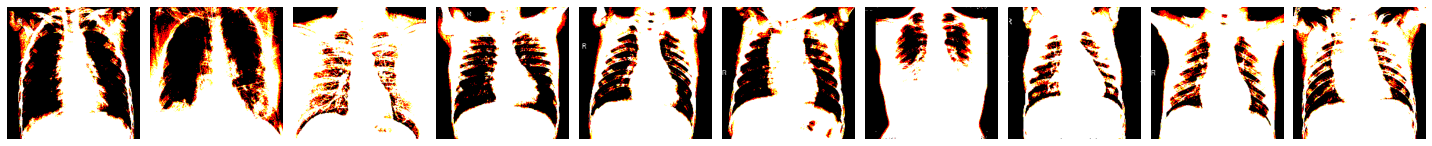

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:
plotImages(imgs)
print(labels)

In [6]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(224,224),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [7]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [37]:
model=Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(filters=256,kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(filters=512,kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(filters=1024,kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(2,activation='softmax')
])
model.build((32,224,224,3))

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, None)    0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, None)    0         
                                                                 
 conv2d_18 (Conv2D)          (32, 222, 222, 64)        1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 111, 111, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 109, 109, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 54, 54, 128)        0         
 g2D)                                                 

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
with tf.device('/CPU:0'):
    history=model.fit(validation_data=valid_batches,x=train_batches,epochs=15,verbose=1)

Epoch 1/15
114/114 [==============================] - 421s 4s/step - loss: 0.4200 - accuracy: 0.8009 - val_loss: 0.1643 - val_accuracy: 0.9275
Epoch 2/15
114/114 [==============================] - 416s 4s/step - loss: 0.1121 - accuracy: 0.9643 - val_loss: 0.0830 - val_accuracy: 0.9714
Epoch 3/15
114/114 [==============================] - 427s 4s/step - loss: 0.0948 - accuracy: 0.9651 - val_loss: 0.1051 - val_accuracy: 0.9582
Epoch 4/15
114/114 [==============================] - 448s 4s/step - loss: 0.1065 - accuracy: 0.9624 - val_loss: 0.1098 - val_accuracy: 0.9560
Epoch 5/15
114/114 [==============================] - 455s 4s/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 0.0617 - val_accuracy: 0.9890
Epoch 6/15
114/114 [==============================] - 458s 4s/step - loss: 0.0688 - accuracy: 0.9775 - val_loss: 0.0500 - val_accuracy: 0.9890
Epoch 7/15
114/114 [==============================] - 466s 4s/step - loss: 0.0794 - accuracy: 0.9723 - val_loss: 0.1206 - val_accuracy: 0.9670

In [41]:
test_imgs, test_labels = next(test_batches)

In [42]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
with tf.device('/CPU:0'):
    predictions=model.predict(x=test_batches,verbose=1)

15/15 [==============================] - 14s 900ms/step


In [44]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [45]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
test_batches.class_indices

{'COVID': 0, 'Normal': 1}

Confusion matrix, without normalization
[[106  22]
 [  0 327]]


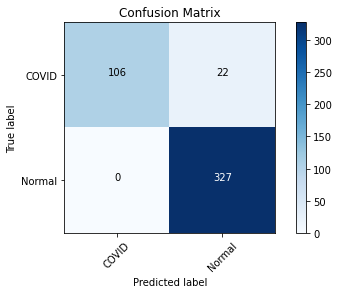

In [48]:
cm_plot_labels = ['COVID','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [49]:
predictions

array([[9.98519480e-01, 1.48047484e-03],
       [9.78602409e-01, 2.13976372e-02],
       [9.99856830e-01, 1.43166864e-04],
       [1.66035572e-03, 9.98339653e-01],
       [2.98459232e-02, 9.70154107e-01],
       [9.99429405e-01, 5.70578326e-04],
       [6.54594243e-01, 3.45405817e-01],
       [9.35510635e-01, 6.44893125e-02],
       [3.85631233e-01, 6.14368796e-01],
       [9.98952270e-01, 1.04765396e-03],
       [9.99999642e-01, 3.99409117e-07],
       [9.99501109e-01, 4.98826266e-04],
       [9.99975443e-01, 2.45580886e-05],
       [9.69364822e-01, 3.06352135e-02],
       [8.85313272e-01, 1.14686713e-01],
       [4.20652390e-01, 5.79347670e-01],
       [9.98261273e-01, 1.73873932e-03],
       [6.28640115e-01, 3.71359915e-01],
       [2.85146356e-01, 7.14853644e-01],
       [9.98894989e-01, 1.10509025e-03],
       [4.92110121e-05, 9.99950767e-01],
       [8.56445253e-01, 1.43554717e-01],
       [9.96004999e-01, 3.99504183e-03],
       [9.98277307e-01, 1.72264664e-03],
       [9.992758

In [50]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 114}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

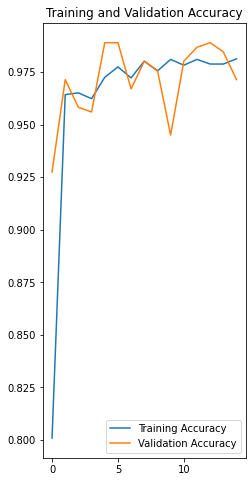

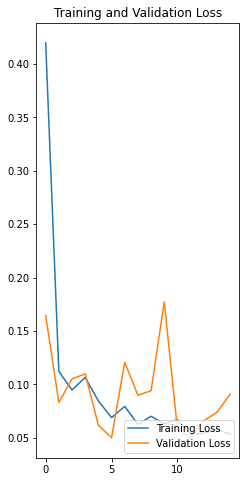

In [55]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(15),acc,label='Training Accuracy')
plt.plot(range(15),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(15),loss,label='Training Loss')
plt.plot(range(15),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
cm

In [ ]:
model.save(f"../models/{12}")

In [204]:
train_batches1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['COVID', 'Normal'], batch_size=32,shuffle=False)

Found 3641 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

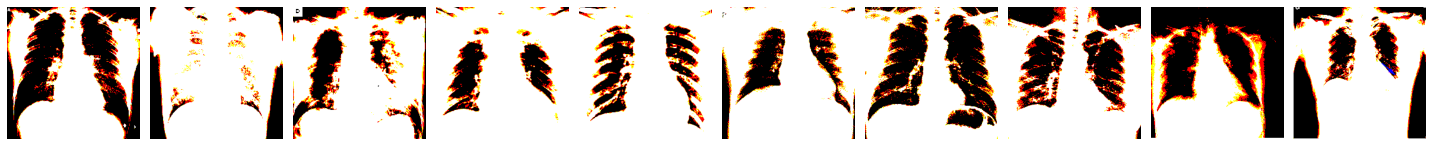

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [205]:
imgs, labels = next(train_batches1)

plotImages(imgs)
print(labels)

In [206]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle=False,
    image_size=(224,224),
    batch_size=32
    )

Found 3641 files belonging to 2 classes.


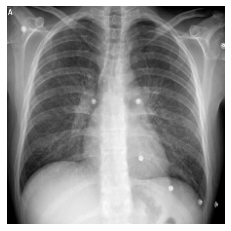

In [207]:
for  image_batch, label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [208]:
img1=tf.keras.applications.vgg16.preprocess_input(
    image_batch[0].numpy().astype("uint8"), data_format=None
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

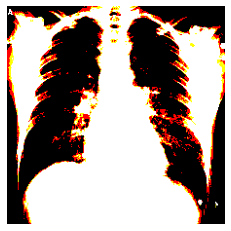

In [209]:
plt.imshow(img1)
plt.axis("off")